# Segmentation of Indian Traffic

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"samaokasha","key":"78dd8fd958b6fccf0e47506dea759e73"}'}

In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [5]:
!kaggle datasets download -d manjotpahwa/indian-driving-dataset

100% 5.51G/5.51G [03:27<00:00, 32.7MB/s]
100% 5.51G/5.51G [03:27<00:00, 28.6MB/s]


In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# !cp '/content/drive/MyDrive/indian-driving-dataset.zip' '/content/'

In [8]:
!unzip '/content/indian-driving-dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: idd20kII/leftImg8bit/train/377/frame11599_leftImg8bit.jpg  
  inflating: idd20kII/leftImg8bit/train/377/frame11762_leftImg8bit.jpg  
  inflating: idd20kII/leftImg8bit/train/377/frame11899_leftImg8bit.jpg  
  inflating: idd20kII/leftImg8bit/train/377/frame12008_leftImg8bit.jpg  
  inflating: idd20kII/leftImg8bit/train/377/frame12117_leftImg8bit.jpg  
  inflating: idd20kII/leftImg8bit/train/377/frame12226_leftImg8bit.jpg  
  inflating: idd20kII/leftImg8bit/train/377/frame12362_leftImg8bit.jpg  
  inflating: idd20kII/leftImg8bit/train/377/frame12444_leftImg8bit.jpg  
  inflating: idd20kII/leftImg8bit/train/377/frame12662_leftImg8bit.jpg  
  inflating: idd20kII/leftImg8bit/train/377/frame12799_leftImg8bit.jpg  
  inflating: idd20kII/leftImg8bit/train/377/frame12935_leftImg8bit.jpg  
  inflating: idd20kII/leftImg8bit/train/377/frame13180_leftImg8bit.jpg  
  inflating: idd20kII/leftImg8bit/train/377/frame13344_leftImg8bit.jpg  


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import math
from PIL import Image, ImageDraw
from PIL import ImagePath
import pandas as pd

from os import path
from tqdm import tqdm
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib  #imporing all the needed libraies 

In [ ]:

!pip install -U tensorflow==2.12.0
import tensorflow as tf
tf.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'2.12.0'

In [ ]:
image_dir='/content/idd20kII/leftImg8bit/train' #Saving the dir of the images
import os

In [ ]:
image_list=[]
for i in sorted(os.listdir(image_dir)):  #storing all the sorted images in an array
  # print(i)
  folder_dir=os.path.join(image_dir,i)
  for image in sorted(os.listdir(folder_dir)):
    image_directory=os.path.join(folder_dir,image)
    image_list.append(image_directory)

In [ ]:
mask_dir='/content/idd20kII/gtFine/train' #Saving the dir of the json files 

In [ ]:
mask_list=[]
for i in sorted(os.listdir(mask_dir)):  #storing all the sorted json files in an array
  # print(i)
  folder_dir=os.path.join(mask_dir,i)
  for mask in sorted(os.listdir(folder_dir)):
    mask_directory=os.path.join(folder_dir,mask)
    mask_list.append(mask_directory)

# Task 1: Preprocessing

## 1. Get all the file name and corresponding json files

In [ ]:
import pandas as pd
data_df= pd.DataFrame(columns=['image','json'])  #creating a dataframe to store the array we created above 

In [ ]:
data_df['image']=image_list
data_df['json']=mask_list

> If you observe the dataframe, we can consider each row as single data point, where first feature is image and the second feature is corresponding json file

In [ ]:
def grader_1(data_df):
    for i in data_df.values:
        if not (path.isfile(i[0]) and path.isfile(i[1]) and i[0][12:i[0].find('_')]==i[1][10:i[1].find('_')]): 
            return False   #checking that they are stored correctly
    return True

In [ ]:
grader_1(data_df)

False

In [ ]:
data_df.shape

(7034, 2)

## 2. Structure of sample Json file

* Each File will have 3 attributes
    * imgHeight: which tells the height of the image
    * imgWidth: which tells the width of the image
    * objects: it is a list of objects, each object will have multiple attributes,
        * label: the type of the object
        * polygon: a list of two element lists, representing the coordinates of the polygon

#### Compute the unique labels

Let's see how many unique objects are there in the json file.

In [ ]:
import json
from tqdm.auto import tqdm
a=[dir]
def return_unique_labels(data_df):
    # for each file in the column json
    # read and store all the objects present in that file
    # compute the unique objects and retrun them
    # if open any json file using any editor you will get better sense of it
    for i in tqdm(data_df['json']):  
      f = open(i,)
      data =json.load(f)
      for j in data['objects']:
        a.append((j.get('label')))
    return a

In [ ]:
unique_labels = return_unique_labels(data_df)

  0%|          | 0/7034 [00:00<?, ?it/s]

In [ ]:
def unique(list1):   #storing them in a list 
    list_set = set(list1) 
    unique_list = (list(list_set)) 
    return unique_list
unique_labels=unique(unique_labels)

In [ ]:
len(unique_labels)

42

In [ ]:
(unique_labels)

['bridge',
 'ego vehicle',
 <function dir>,
 'curb',
 'vegetation',
 'billboard',
 'motorcycle',
 'person',
 'pole',
 'drivable fallback',
 'fallback background',
 'rail track',
 'sky',
 'bicycle',
 'rider',
 'animal',
 'car',
 'truck',
 'guard rail',
 'ground',
 'polegroup',
 'caravan',
 'fence',
 'non-drivable fallback',
 'wall',
 'license plate',
 'building',
 'traffic light',
 'unlabeled',
 'rectification border',
 'road',
 'bus',
 'vehicle fallback',
 'sidewalk',
 'trailer',
 'train',
 'traffic sign',
 'out of roi',
 'parking',
 'tunnel',
 'obs-str-bar-fallback',
 'autorickshaw']

In [ ]:
unique_labels.remove(unique_labels[26])  #displaying the chart

<img src='https://i.imgur.com/L4QH6Tp.png'>

In [ ]:
label_clr = {'road':10, 'parking':20, 'drivable fallback':20,'sidewalk':30,'non-drivable fallback':40,'rail track':40,\
                        'person':50, 'animal':50, 'rider':60, 'motorcycle':70, 'bicycle':70, 'autorickshaw':80,\
                        'car':80, 'truck':90, 'bus':90, 'vehicle fallback':90, 'trailer':90, 'caravan':90,\
                        'curb':100, 'wall':100, 'fence':110,'guard rail':110, 'billboard':120,'traffic sign':120,\
                        'traffic light':120, 'pole':130, 'polegroup':130, 'obs-str-bar-fallback':130,'building':140,\
                        'bridge':140,'tunnel':140, 'vegetation':150, 'sky':160, 'fallback background':160,'unlabeled':0,\
                        'out of roi':0, 'ego vehicle':170, 'ground':180,'rectification border':190,\
                   'train':200} #giving each label a number 

In [ ]:
def grader_2(unique_labels):
    if (not (set(label_clr.keys())-set(unique_labels))) and len(unique_labels) == 40: 
        print("True")
    else:
        print("Flase")

grader_2(unique_labels)    #checking if all the uniques labels has got a number

Flase


<pre>
* here we have given a number for each of object types, if you see we are having 41 different set of objects
* Note that we have multiplies each object's number with 10, that is just to make different objects look differently in the segmentation map
* Before you pass it to the models, you might need to devide the image array /10.
</pre>

## 3. Extracting the polygons from the json files

In [ ]:
def get_poly(file):
    f = open(file,)
    data = json.load(f)  #string the info of json file
    label,vertexlist=[],[]
    for obj in data['objects']:   #looping to reach the polygon 
        label.append(obj['label'])
        vertexlist.append([tuple(vertex) for vertex in obj['polygon']])
    w= data['imgWidth']  #storing the required info
    h=data['imgHeight']
    return w, h, label, vertexlist

In [ ]:
get_poly('/content/idd20kII/gtFine/train/201/frame0029_gtFine_polygons.json')  #checking the function 

(1920,
 1080,
 ['road',
  'drivable fallback',
  'drivable fallback',
  'drivable fallback',
  'drivable fallback',
  'motorcycle',
  'sky',
  'drivable fallback',
  'curb',
  'motorcycle',
  'motorcycle',
  'building',
  'vegetation',
  'vegetation',
  'obs-str-bar-fallback',
  'billboard',
  'vegetation',
  'building',
  'obs-str-bar-fallback',
  'building',
  'building',
  'obs-str-bar-fallback',
  'building',
  'autorickshaw',
  'billboard',
  'billboard',
  'obs-str-bar-fallback',
  'pole',
  'obs-str-bar-fallback',
  'car',
  'building',
  'obs-str-bar-fallback',
  'truck',
  'person',
  'person',
  'building',
  'building',
  'pole',
  'building',
  'pole',
  'obs-str-bar-fallback',
  'obs-str-bar-fallback',
  'building',
  'pole',
  'building',
  'billboard',
  'billboard',
  'billboard',
  'pole',
  'billboard',
  'billboard',
  'billboard',
  'obs-str-bar-fallback',
  'obs-str-bar-fallback',
  'person',
  'motorcycle',
  'car',
  'obs-str-bar-fallback',
  'motorcycle',
  'tru

In [ ]:
def grader_3(file):
    w, h, labels, vertexlist = get_poly(file)
    print(len((set(labels)))==18 and len(vertexlist)==227 and w==1920 and h==1080 \    #checking that all the var are stored 
          and isinstance(vertexlist,list) and isinstance(vertexlist[0],list) and isinstance(vertexlist[0][0],tuple) )

grader_3('/content/idd20kII/gtFine/train/201/frame0029_gtFine_polygons.json')

True


## 4. Creating Image segmentations by drawing set of polygons

### Example

In [ ]:
!ls data_df

ls: cannot access 'data_df': No such file or directory


In [ ]:
def compute_masks(data_df):
    mask=[]
    for file in tqdm(data_df['json']):  #reading the json file
        w, h, labels, vertexlist = get_poly(file)  #rextracting the polygon using the function 

        img= Image.new("RGB",(w,h))  #displaying it in RGB 
        img1 = ImageDraw.Draw(img)
        for i in range(len(labels)):
            if(len(vertexlist[i])>1):
                img1.polygon(vertexlist[i], fill = label_clr.get(labels[i])) #checking if the polygon is extracted then given it its label
        img=np.array(img)
        im = Image.fromarray(img[:,:,0])  
        new_file=file.replace('input','working')  #strorig the file 
        new_file=new_file.replace('json','png')  #in a png form 
        # print(file, file.split('/')[7])
        print(new_file)
        os.makedirs('/content/'+file.split('/')[2],exist_ok=True)
        im.save(new_file)  #and saving it in another dir 
        mask.append(new_file)  #stroring the maksed images 
    data_df['mask']=mask
    
    return data_df

In [ ]:
data_df = compute_masks(data_df)
data_df.head()

  0%|          | 0/7034 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
/content/idd20kII/gtFine/train/314/frame17499_gtFine_polygons.png
/content/idd20kII/gtFine/train/314/frame18544_gtFine_polygons.png
/content/idd20kII/gtFine/train/314/frame19135_gtFine_polygons.png
/content/idd20kII/gtFine/train/314/frame19453_gtFine_polygons.png
/content/idd20kII/gtFine/train/314/frame19635_gtFine_polygons.png
/content/idd20kII/gtFine/train/314/frame19771_gtFine_polygons.png
/content/idd20kII/gtFine/train/314/frame20317_gtFine_polygons.png
/content/idd20kII/gtFine/train/314/frame20499_gtFine_polygons.png
/content/idd20kII/gtFine/train/314/frame20635_gtFine_polygons.png
/content/idd20kII/gtFine/train/314/frame20999_gtFine_polygons.png
/content/idd20kII/gtFine/train/314/frame21226_gtFine_polygons.png
/content/idd20kII/gtFine/train/314/frame21499_gtFine_polygons.png
/content/idd20kII/gtFine/train/314/frame21635_gtFine_polygons.png
/content/idd20kII/gtFine/train/314/frame21953_gtFine_polygons.png
/content/idd20kII/gtFine/

,image,json,mask
0,/content/idd20kII/leftImg8bit/train/201/frame0...,/content/idd20kII/gtFine/train/201/frame0029_g...,/content/idd20kII/gtFine/train/201/frame0029_g...
1,/content/idd20kII/leftImg8bit/train/201/frame0...,/content/idd20kII/gtFine/train/201/frame0299_g...,/content/idd20kII/gtFine/train/201/frame0299_g...
2,/content/idd20kII/leftImg8bit/train/201/frame0...,/content/idd20kII/gtFine/train/201/frame0779_g...,/content/idd20kII/gtFine/train/201/frame0779_g...
3,/content/idd20kII/leftImg8bit/train/201/frame1...,/content/idd20kII/gtFine/train/201/frame1019_g...,/content/idd20kII/gtFine/train/201/frame1019_g...
4,/content/idd20kII/leftImg8bit/train/201/frame1...,/content/idd20kII/gtFine/train/201/frame1469_g...,/content/idd20kII/gtFine/train/201/frame1469_g...


In [ ]:
import joblib
joblib.dump(data_df,'data.pkl')  

['data.pkl']

In [ ]:
import joblib
data_df = joblib.load('data.pkl')

In [ ]:
import urllib.request

[[[160 160 160]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[160 160 160]
  [160 160 160]
  [160 160 160]
  ...
  [160 160 160]
  [  0   0   0]
  [  0   0   0]]

 [[160 160 160]
  [160 160 160]
  [160 160 160]
  ...
  [160 160 160]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[ 10  10  10]
  [ 10  10  10]
  [ 10  10  10]
  ...
  [ 10  10  10]
  [ 10  10  10]
  [ 10  10  10]]

 [[ 10  10  10]
  [ 10  10  10]
  [ 10  10  10]
  ...
  [ 10  10  10]
  [ 10  10  10]
  [ 10  10  10]]

 [[ 10  10  10]
  [ 10  10  10]
  [ 10  10  10]
  ...
  [ 10  10  10]
  [ 10  10  10]
  [ 10  10  10]]]
True
[  0  10  20  40  50  60  70  80  90 100 120 130 140 150 160]
[  0  10  20  40  50  60  70  80  90 100 120 130 140 150 160]


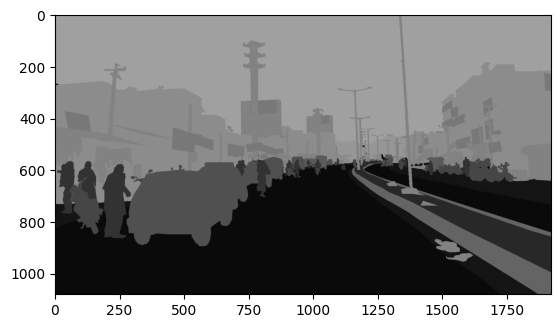

In [ ]:
def grader_3():
    url = "https://i.imgur.com/4XSUlHk.png"    #using urlib to use the pretrained model to show are results 
    url_response = urllib.request.urlopen(url)
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    img = cv2.imdecode(img_array, -1)
    my_img = cv2.imread('/content/idd20kII/gtFine/train/201/frame0029_gtFine_polygons.png')  #given an image to check 
    print(my_img)
    plt.imshow(my_img)
    print((my_img[:,:,0]==img).all())
    print(np.unique(img))
    print(np.unique(my_img[:,:,0]))
    data_df.to_csv('preprocessed_data.csv', index=False)
grader_3()